In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#I imported the main libraries that I anticipate I will use

In [3]:
%matplotlib inline

In [4]:
path='/Users/user/Downloads/concrete.csv'
#the dataset path

In [5]:
df=pd.read_csv(path)
#I imported the dataset

In [6]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [7]:
df.shape
#this dataset contains more than 1000 observations: different kinds of cements

(1030, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


So, apparently there are no null values...

In [9]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


some features, i.e. slag, ash or superplastic include 0. For what I know (i lack domain knowledge on this kind of cements), these might be real values, i.e. some cements may not contain them. I am not going to remove these values

# Exploratory Data Analysis

## Univariate analysis

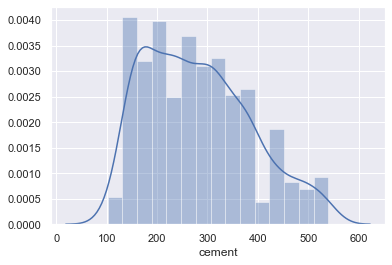

In [10]:
sns.distplot(df.cement)
#a series of distplot are used to check the distribution of the variables

This is probably the closer one feature of this dataset gets to a normal distribution

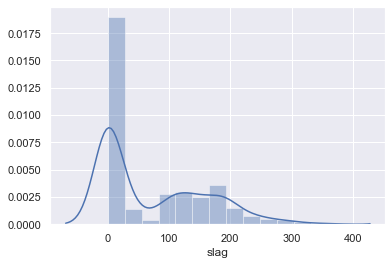

In [11]:
sns.distplot(df.slag)

most samples appear to not contain slag. It would probably be possible to transform this variable into a categorical yes slag/no slag type of variable. For the sake of simplicity I did not.

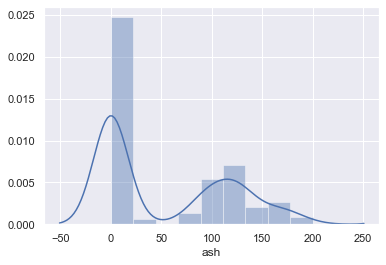

In [13]:
sns.distplot(df.ash)

Same as with slag. An alternative route would be turn it into a categorical variable

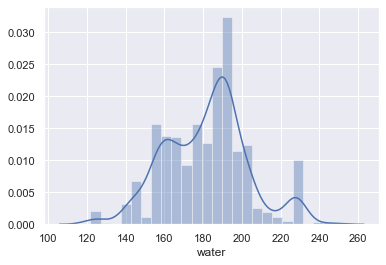

In [14]:
sns.distplot(df.water)

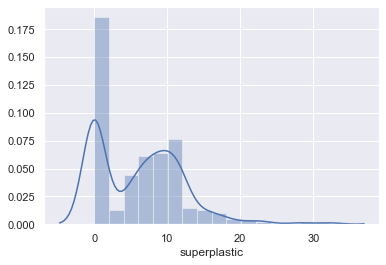

In [15]:
sns.distplot(df.superplastic)

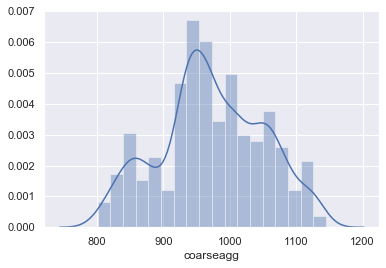

In [17]:
sns.distplot(df.coarseagg)

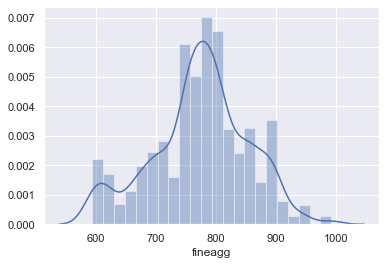

In [18]:
sns.distplot(df.fineagg)

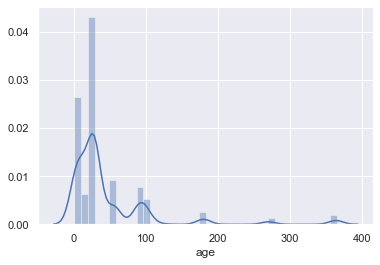

In [19]:
sns.distplot(df.age)

There are actually few different values of age. This means that cements were tested at fixed and established times. I guess this variable could be even treated as a categorical one. I am just treating it as a very skewed continuous one, for the sake of simplicity

In [22]:
df.age.nunique()
#how many unique values of age are there in the dataset, anyway?

14

In [23]:
df.age.value_counts()
#what are the most common time points for strength assessment?

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

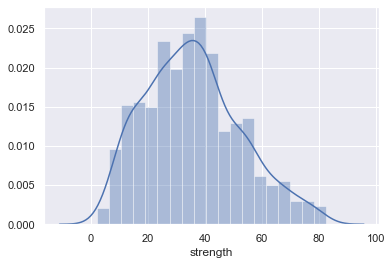

In [20]:
sns.distplot(df.strength)

almost a normal distribution, not as skewed as the other variables. When taken together these variables suggest that, if we want to use an algorithm like linear regression we should at least try to transform them

## Bivariate analysis

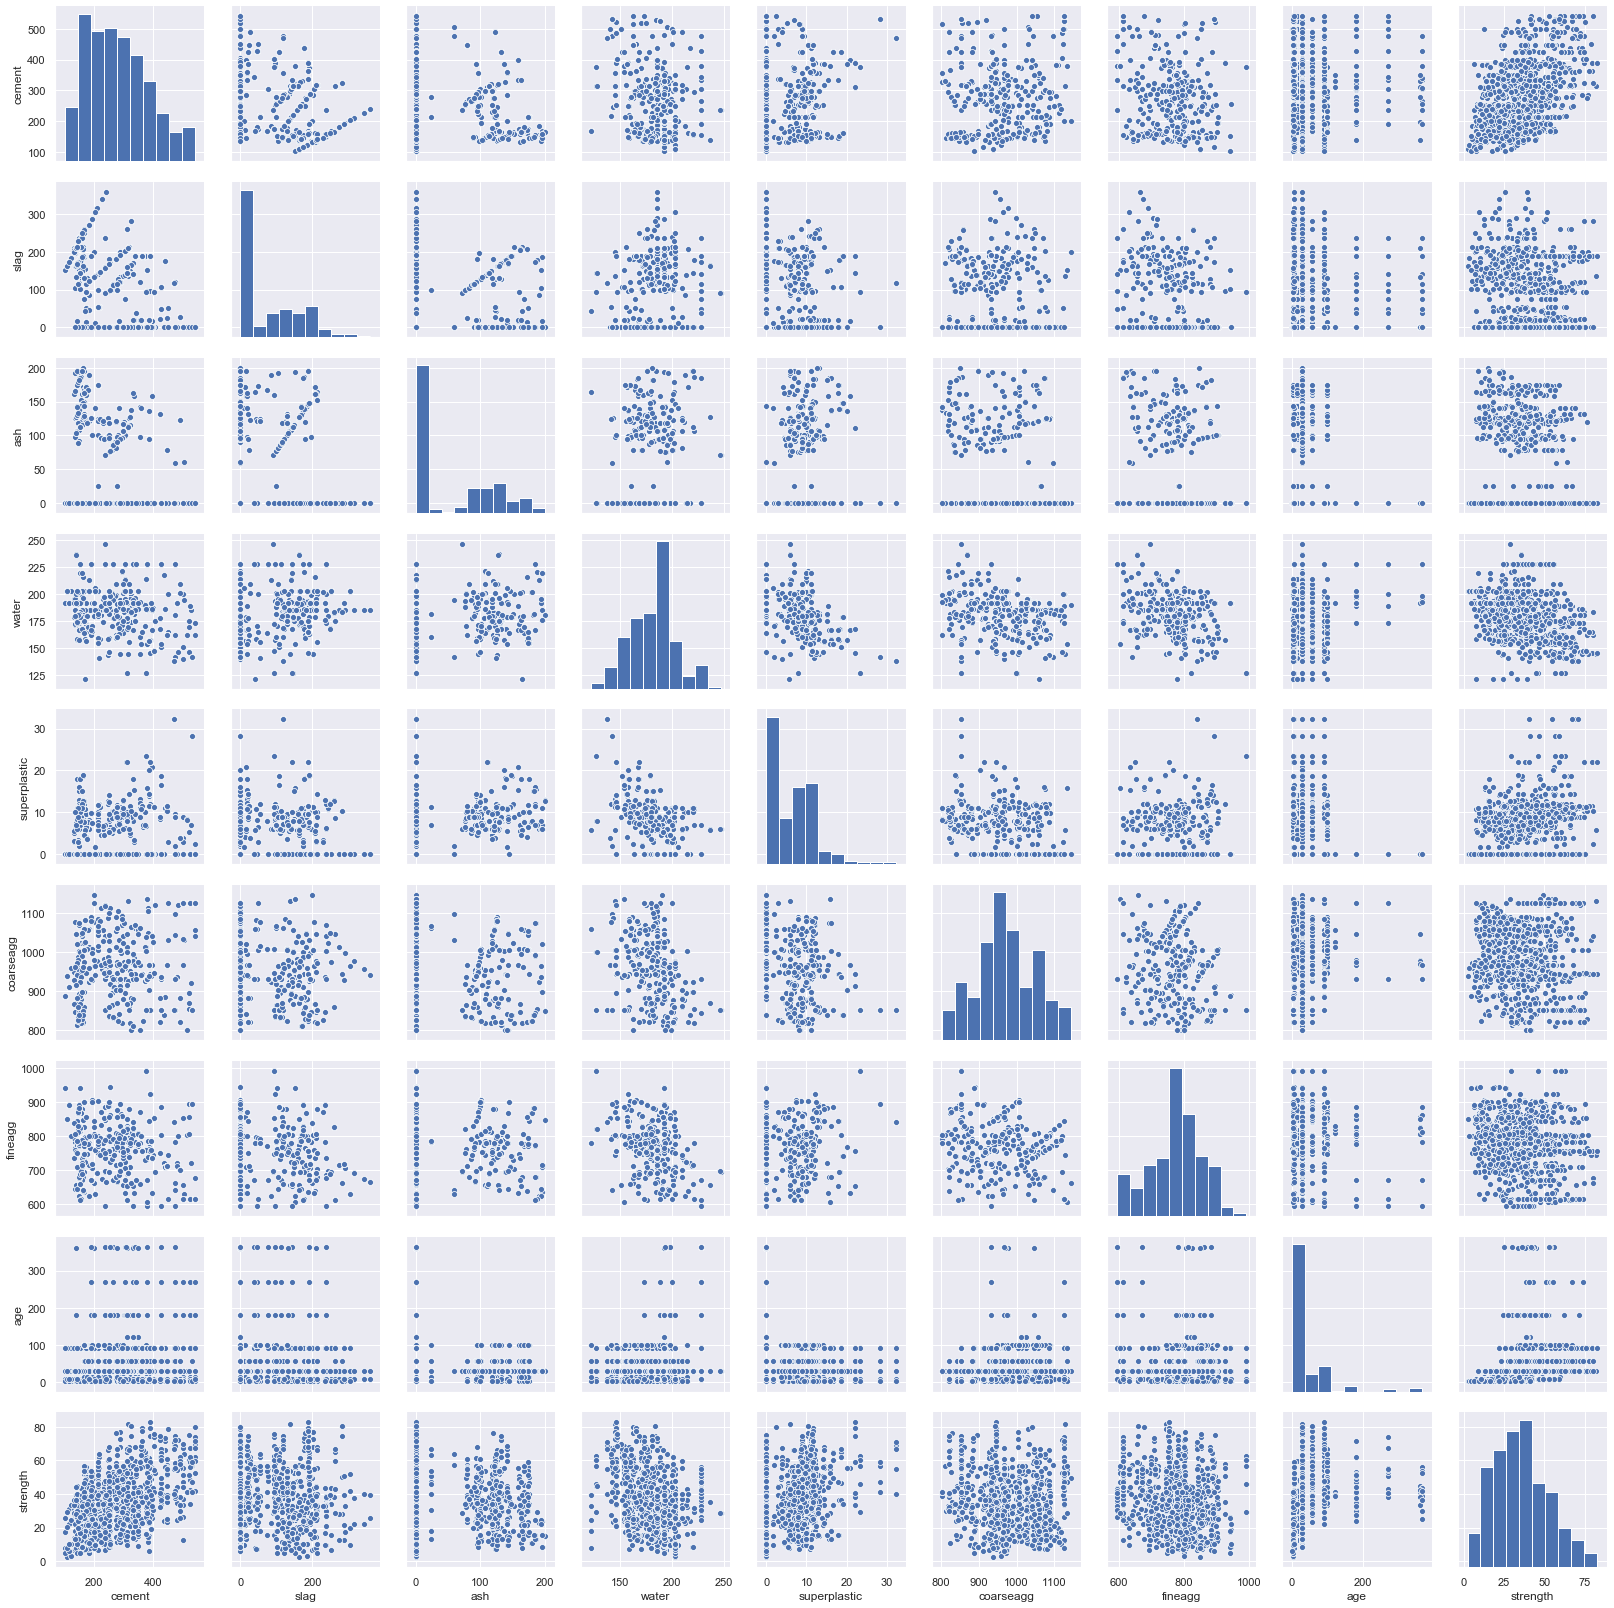

In [21]:
sns.pairplot(df)
#a preliminary view of the relation between variables

The amount of cement appears to have the highest and clearest correlation with strength

In [6]:
df.cov()
#this is used to checked the direction of the association between variables

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,10921.580220,-2481.550406,-2658.299034,-182.073210,57.677098,-888.546203,-1866.130628,540.979608,869.143022
slag,-2481.550406,7444.124812,-1786.685054,197.604130,22.302400,-1905.221719,-1947.995145,-241.152238,194.337561
ash,-2658.299034,-1786.685054,4095.616541,-351.195911,144.322455,-49.565280,405.907450,-624.071384,-113.064425
water,-182.073210,197.604130,-351.195911,456.002651,-83.879313,-302.675726,-771.574925,374.491462,-103.323253
superplastic,57.677098,22.302400,144.322455,-83.879313,35.686781,-123.553888,106.659877,-72.718638,36.533734
coarseagg,-888.546203,-1905.221719,-49.565280,-302.675726,-123.553888,6045.677357,-1112.650194,-14.813131,-214.239754
fineagg,-1866.130628,-1947.995145,405.907450,-771.574925,106.659877,-1112.650194,6428.187792,-790.574335,-224.002799
age,540.979608,-241.152238,-624.071384,374.491462,-72.718638,-14.813131,-790.574335,3990.437729,347.059758
strength,869.143022,194.337561,-113.064425,-103.323253,36.533734,-214.239754,-224.002799,347.059758,279.081814


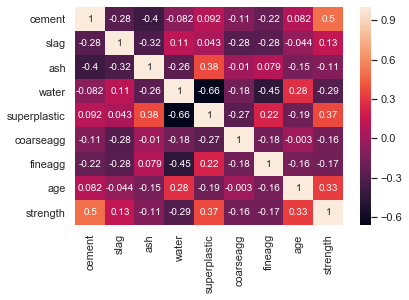

In [25]:
corr= df.corr()
sns.heatmap(corr, annot=True)

age, cement and superplastic have the higher correlation with strength. This makes quite sense. The more cement powder is added to the cement, the stronger it gets, the more you wait till it sets before testig it, the stronger it turns out to be. However, I wonder whether the ration of these components to the amount of water may affect the strength of cement, so I decided to create new features

# Feature engineering

In [7]:
df['ratio_cement']=df.cement/df.water
df['ratio_slag']=df.slag/df.water
df['ratio_ash']=df.ash/df.water
df['ratio_spp']=df.superplastic/df.water
df['ratio_coarse']=df.coarseagg/df.water
df['ratio_fine']=df.fineagg/df.water
df['ratio_agg']=df.coarseagg/df.fineagg

I created new features, as the ratio between components and water. I tried all components

In [33]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'ratio', 'ratio_cement'],
      dtype='object')

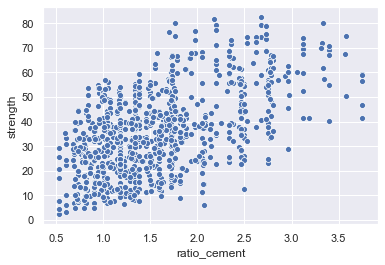

In [34]:
sns.scatterplot(x=df.ratio_cement, y=df.strength)

The ration between water and cement has a good correlation with strength

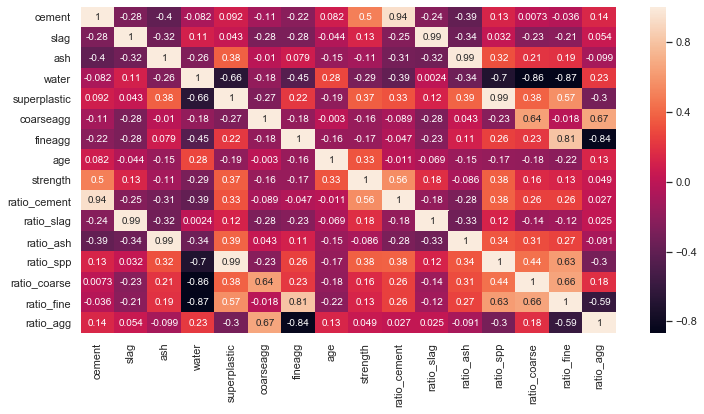

In [43]:
corr=df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True)

#this heatmap shows us the correlation of the new features to the strengtth of the cement

The new correlation matrix shows that most water/component ratios do not add much, but the cement/water and the superplastic/water ratios have improved Pearson Rs than the simple components. So I decide to include them as features in my algorithms.

In [40]:
df=df.drop('ratio', axis=1)

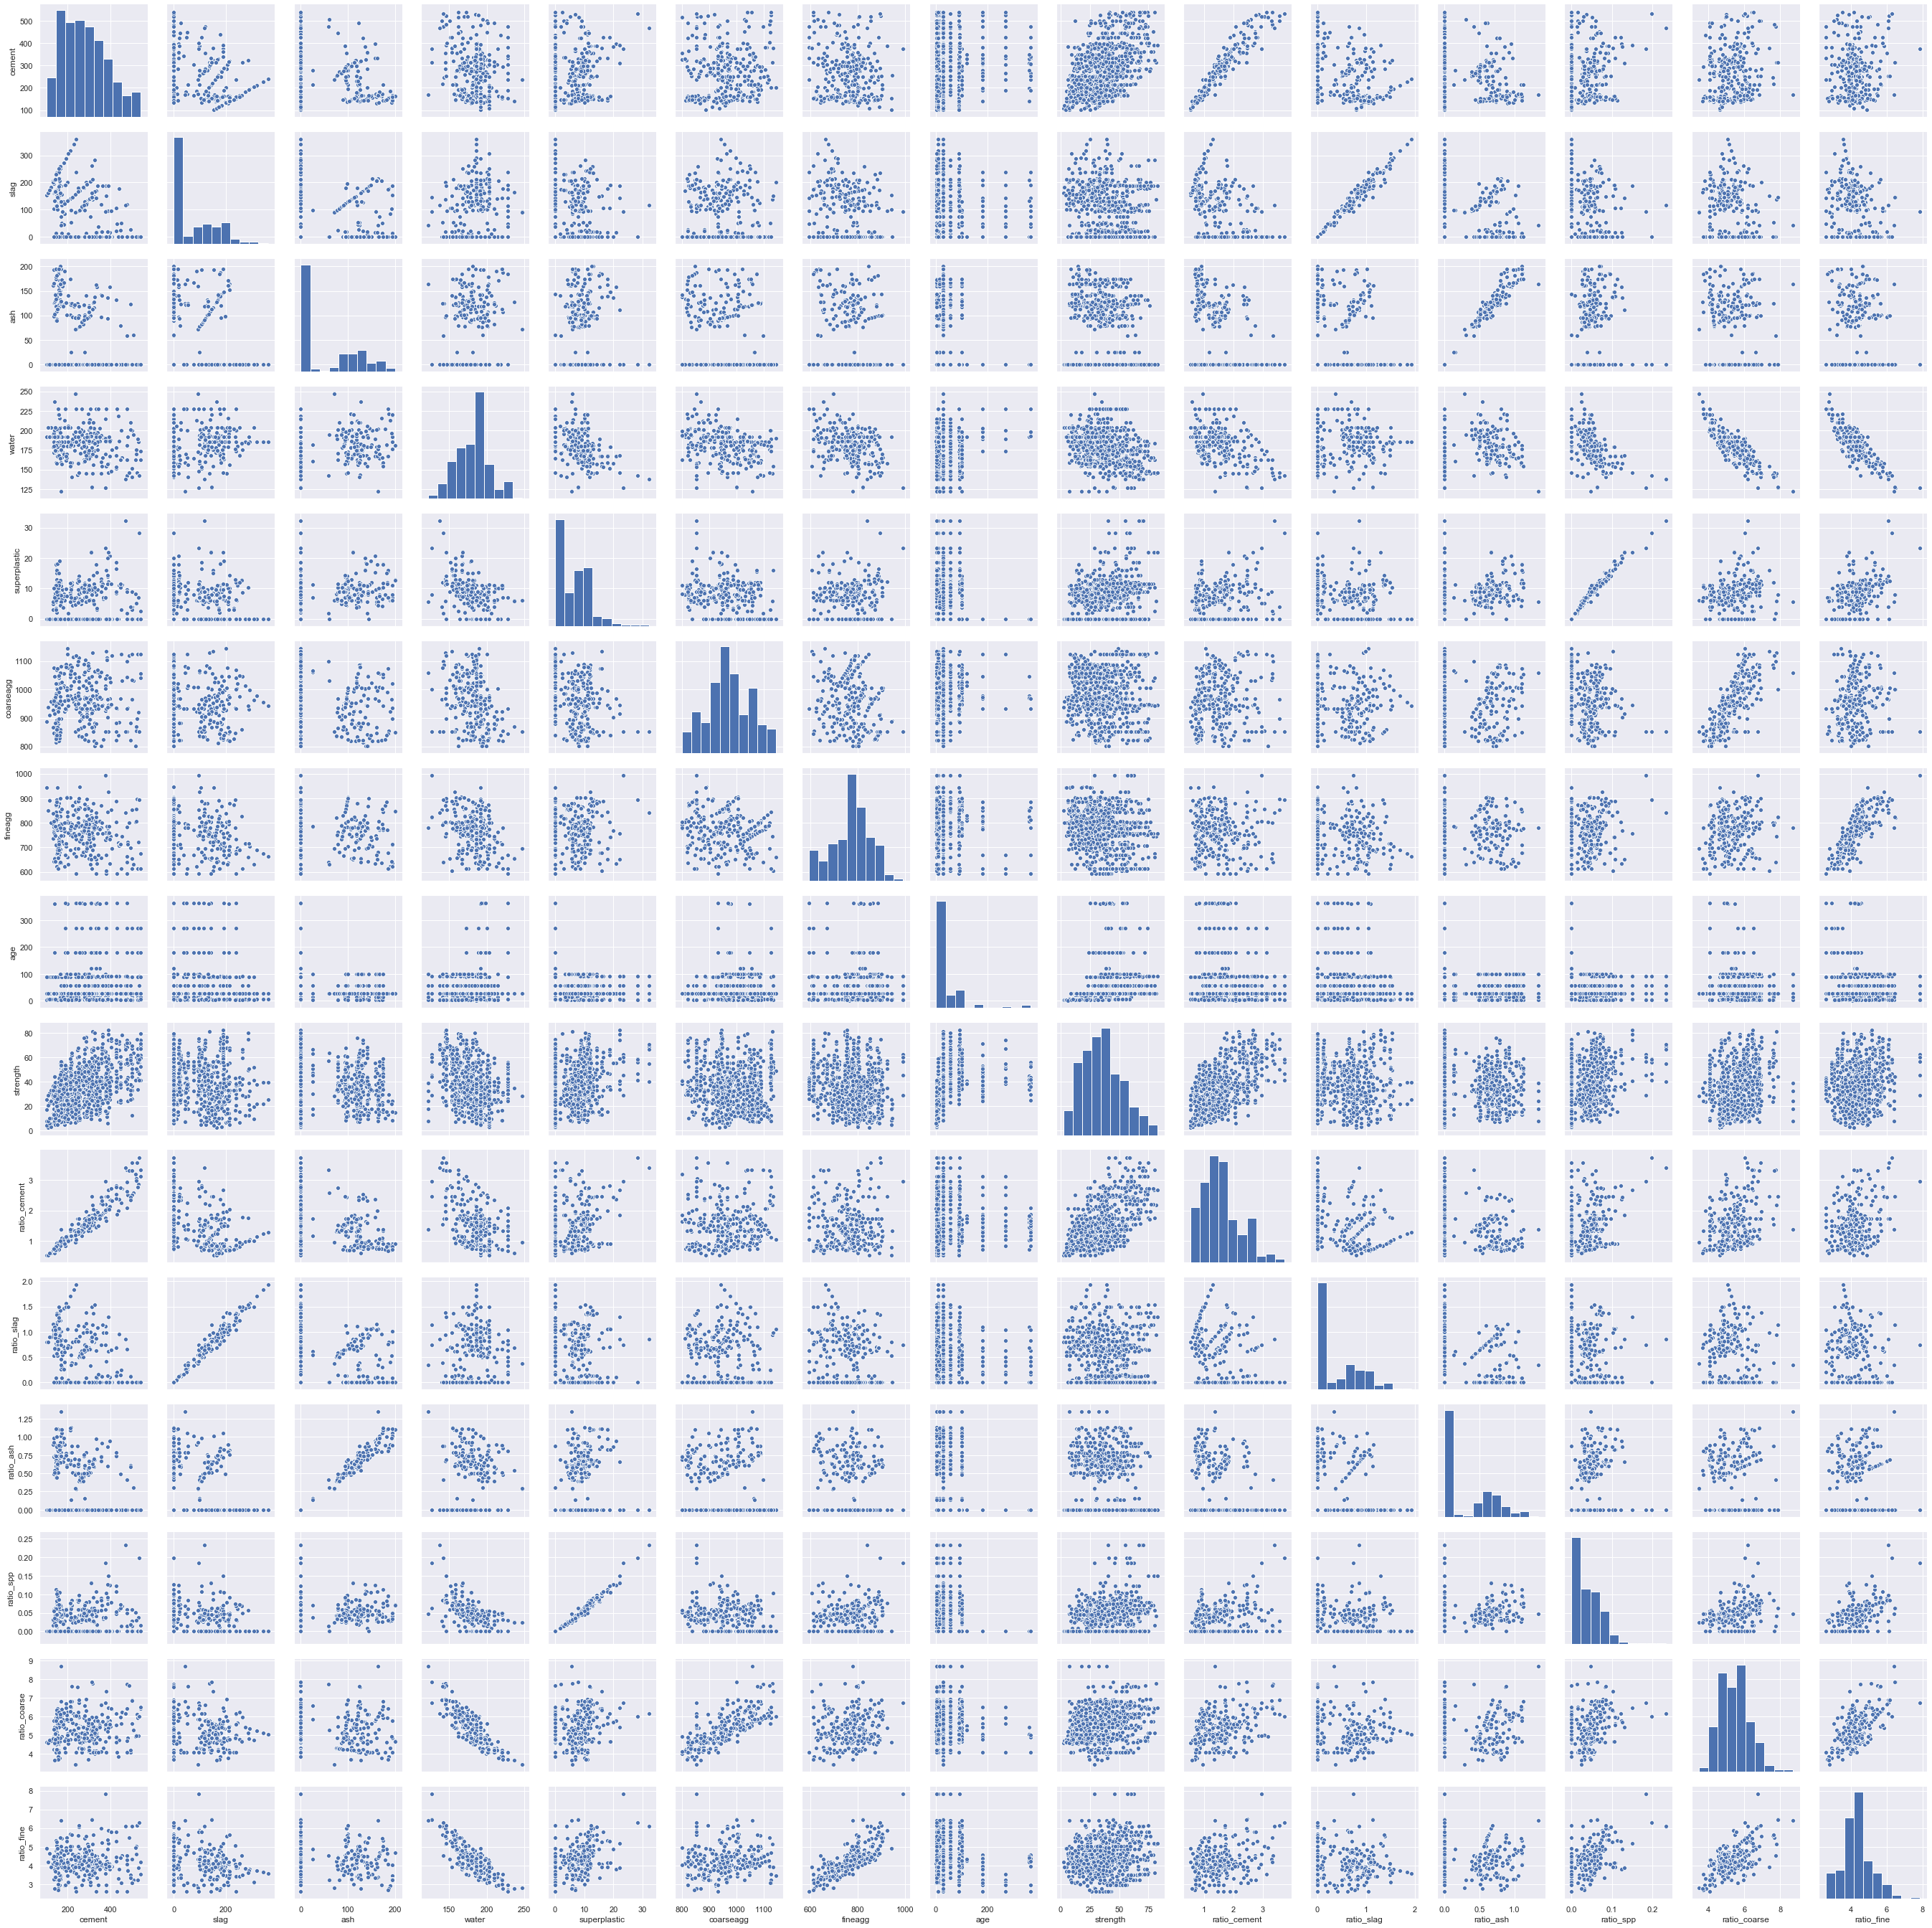

In [41]:
sns.pairplot(df)

# Data preparation

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler= MinMaxScaler()
#I want to use linear regression, so I try and transform the data, to get them closer to normality

In [10]:
for index, column in enumerate(df.columns):
    df[column]= scaler.fit_transform(df[[column]])

In [18]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,ratio_cement,ratio_slag,ratio_ash,ratio_spp,ratio_coarse,ratio_fine,ratio_agg
0,0.089726,0.589872,0.000000,0.652556,0.000000,0.496512,0.387607,0.074176,0.343341,0.050722,0.538276,0.000000,0.000000,0.252352,0.204935,0.432770
1,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,0.035714,0.263859,0.166599,0.137742,0.583880,0.291969,0.644075,0.463103,0.490933
2,0.337900,0.000000,0.478261,0.523962,0.170807,0.453198,0.670346,0.074176,0.334994,0.249658,0.000000,0.379731,0.125599,0.315490,0.380169,0.248589
3,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,0.074176,0.542170,0.197606,0.258347,0.000000,0.000000,0.121076,0.063672,0.523987
4,0.120548,0.510295,0.000000,0.571086,0.282609,0.716279,0.257652,0.074176,0.198829,0.083835,0.490232,0.000000,0.201467,0.375110,0.190820,0.634500


In [13]:
from sklearn.model_selection import train_test_split

In [60]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'ratio_cement', 'ratio_slag', 'ratio_ash',
       'ratio_spp', 'ratio_coarse', 'ratio_fine', 'ratio_agg'],
      dtype='object')

In [69]:
#I create a feature matrix X and a target y. I decided to drop cement, superplastic and water (beside the remaining component to water ratios) to avoid colinearity with their ratios
X=df[['slag', 'ash', 'coarseagg','fineagg', 'age', 'ratio_cement', 'ratio_spp']]
y=df.strength

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# I created a train set and a test set

# Linear regression

In [15]:
from sklearn.linear_model import LinearRegression
#Firts algorithm I want to try is linear regresison

In [71]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
model.score(X_train, y_train)

0.6143127093333369

In [73]:
model.score(X_test, y_test)

0.5792655821175672

In [19]:
from sklearn import model_selection

In [74]:
seed = 6

kfold = model_selection.KFold(n_splits=20)
#This is cross-validation object


In [75]:
resultsl = model_selection.cross_val_score(model, X_train, y_train, scoring='r2', cv=kfold)
#I performed cross validation on the train set only, I keep the test set only for final verification

print("R^2: %.3f (%.3f)" % (resultsl.mean(), resultsl.std()))
mean_linear= resultsl.mean()
std_linear= resultsl.std()

R^2: 0.590 (0.122)


The R^2 that is obtained is basically related to the goodness of fit, i.e. how well the model is able to fit the data and predict new target values based on new data. Linear regression yields quite a low R^2 so it does not appear to be a good model. Needs to be increased, to enhance the relevance of predictions based on this model

# Polynomial features

In [76]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures( degree = 2, include_bias = False) 

# Although that was not really apparent from the scatterplots, 
#I decided to include some polynomial (second order) features to linear regression, to see how it goes

In [77]:
xPoly_train = poly.fit_transform(X_train)

In [78]:
modelP2 = model.fit(xPoly_train, y_train)

In [79]:
print(modelP2.score(xPoly_train, y_train))

0.8171652562132439


In [112]:
xPoly_test = poly.fit_transform(X_test)

In [115]:
modelP2.score(xPoly_test, y_test)
# let's try it on the test set!

0.7335975142072781

The model R^2 is definitely better! But it can certainly be improved

In [80]:
resultsp = model_selection.cross_val_score(modelP2, xPoly_train, y_train, scoring='r2', cv=kfold)
#let's do cross validation on the train set
print("R^2: %.3f (%.3f)" % (resultsp.mean(), resultsp.std()))
mean_poly= resultsp.mean()
std_poly= resultsp.std()

R^2: 0.784 (0.053)


# Bagging

In [27]:
from sklearn.ensemble import BaggingRegressor
#ensemble regressor are known to get good results, so I am going to try them out!

In [81]:
bag = BaggingRegressor(n_estimators=10, random_state=0)
#First I am using default values, to see where we are

In [82]:
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=0, verbose=0,
                 warm_start=False)

In [83]:
bag.score(X_train, y_train)

0.9799131211777294

In [84]:
bag.score(X_test, y_test)

0.8821130085023329

In [85]:
resultsbg = model_selection.cross_val_score(bag, X_train, y_train, scoring='r2', cv=kfold)
print("R^2: %.3f (%.3f)" % (resultsbg.mean(), resultsbg.std()))

R^2: 0.884 (0.049)


Overall the performance of the model is a step above linear regression and it gets good R^2 even with default values! This means we could probably already use it out of the box.

In [86]:
mean_bag= resultsbg.mean()
std_bag= resultsbg.std()

# Boosting

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [87]:
boost = GradientBoostingRegressor(random_state=0)

In [88]:
boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [89]:
boost.score(X_train, y_train)

0.9497257538553423

In [90]:
boost.score(X_test, y_test)

0.8823125189267549

In [91]:
resultsbo = model_selection.cross_val_score(boost, X_train, y_train, scoring='r2', cv=kfold)
print("R^2: %.3f (%.3f)" % (resultsbo.mean(), resultsbo.std()))
mean_boo= resultsbo.mean()
std_boo= resultsbo.std()

R^2: 0.904 (0.042)


So far this is the best score we got, so I would resort to use this model

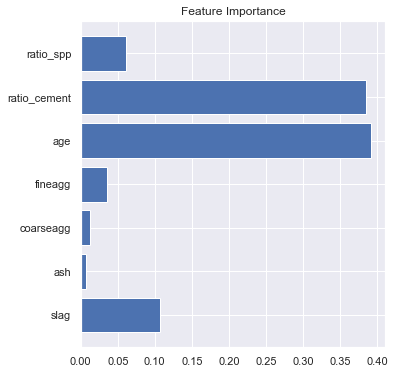

In [92]:
feature_importance = boost.feature_importances_
fig = plt.figure(figsize=(12, 6))
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 1)
plt.yticks(pos, X.columns)
plt.barh(pos, feature_importance, align='center')
plt.title('Feature Importance')
plt.show()

Boosting allows to analyze the relevance of features on the regression. As expected by their high Pearson R values, age and ration cement/water are the most relevant features

In [93]:
means=pd.Series([mean_linear, mean_poly, mean_bag, mean_boo])
stds=pd.Series([std_linear, std_poly, std_bag, std_boo])
prelim=pd.DataFrame([means, stds] )
#index=['mean', 'std'], 

In [94]:
prelim.columns=['Linear regression', 'Poly features', 'Bagging', 'Boosting']
prelim.index=['mean', 'std']

In [95]:
prelim.T

,mean,std
Linear regression,0.589781,0.122279
Poly features,0.783925,0.053135
Bagging,0.884059,0.048665
Boosting,0.904338,0.042124


Average R^2 score for different regression algorithms, evaluated by cross validation. R^2 is expressed as mean+/- standard deviation of the CV

# Randomizedsearch CV - Boosting

I decided to fine tune the parameters for Bagging and Boosting algorithms using random CV search

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [96]:
param_dist = {"max_depth": [3, None],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "criterion": ["friedman_mse", "mse", "mae"]}

                          

In [97]:
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(boost, param_distributions=param_dist, n_iter=samples) 



In [98]:
randomCV.fit(X_train, y_train)
print(randomCV.best_params_)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 4}


So these are the optimized parameters, which I will now test in the model

In [99]:
boost1 =GradientBoostingRegressor(criterion='friedman_mse',
 max_depth= None,
 min_samples_leaf= 10,
 min_samples_split= 4)

In [100]:
boost1.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=None,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [101]:
resultsrbo = model_selection.cross_val_score(boost1, X_train, y_train, scoring='r2', cv=kfold)
print("R^2: %.3f (%.3f)" % (resultsrbo.mean(), resultsrbo.std()))
mean_rboo=resultsrbo.mean()
std_rboo=resultsrbo.std()

R^2: 0.921 (0.039)


In [102]:
print(boost1.score(X_test, y_test))
test_boo= boost1.score(X_test, y_test)

0.9147226988403894


It looks better than what I got with my default values!

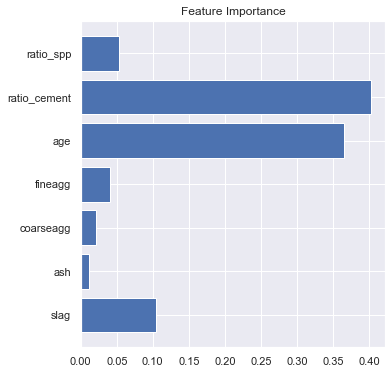

In [103]:
feature_importance = boost1.feature_importances_
fig = plt.figure(figsize=(12, 6))
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 1)
plt.yticks(pos, X.columns)
plt.barh(pos, feature_importance, align='center')
plt.title('Feature Importance')
plt.show()

# Randomizedsearch CV - Bagging

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [104]:
param_dist = {'bootstrap': [True,False],
              'bootstrap_features': [True,False],
              "n_estimators" : [25,50,100]}



                          

In [105]:
samples = 100  # number of random samples 
randomCV2 = RandomizedSearchCV(bag, param_distributions=param_dist, n_iter=samples) 




In [106]:
randomCV2.fit(X_train, y_train)
print(randomCV2.best_params_)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'n_estimators': 100, 'bootstrap_features': False, 'bootstrap': True}


So these are the optimized parameters, which I will now test in the model

In [107]:
bag1 = BaggingRegressor(n_estimators=100, 
                        bootstrap= True, 
                        bootstrap_features= False)




In [108]:
bag1.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=100,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [109]:
resultsrbag = model_selection.cross_val_score(bag1, X_train, y_train, scoring='r2', cv=kfold)
print("R^2: %.3f (%.3f)" % (resultsrbag.mean(), resultsrbag.std()))
mean_rbag=resultsrbag.mean()
std_rbag=resultsrbag.std()

R^2: 0.897 (0.047)


In [110]:
test_rbag=bag1.score(X_test, y_test)
bag1.score(X_test, y_test)

0.897029356154629

In [111]:
meansr=pd.Series([mean_rboo, mean_rbag])
stdsr=pd.Series([std_rboo, std_rbag])
tests=pd.Series([test_boo, test_rbag])
randoms=pd.DataFrame([meansr, stdsr, tests] )
randoms.columns=['Boosting', 'Bagging']
randoms.index=['Mean', 'Std', 'Test']
randoms.T

,Mean,Std,Test
Boosting,0.920986,0.038925,0.914723
Bagging,0.897276,0.046610,0.897029


Both models got very close to 90% after parameter tuning and boosting was even higher. The best results on the test set were with boosting, possibly unsurprisingly so.

# Final remarks

The best predictive features are cement/water ratio and age, which would suggest that pouring too little cement powder into water is going to have detrimental effect on the strength of the final product. Maybe nothing new from common knowledge but the data confirmed it nicely. Best results furthermore are obtained over time, as cement progressively sets.